**Documentation**


1.   **EDA**:
* We only have null values in the status column 77%
* Description column is cleaned: removed stop words+punctuations+lowercase
* Changing the categorical column status to numerical values.
* added column number of words for each description
2.   **Visualization**:


* Visualization of the **popularity** of each class using bar char
* Visualization of the **status** Of Startups Based On our class column using scatter plot + bar chart
* Word **cloud** for our cleaned description column 
* Visualization for the description **length** for every startup using bar chart
* Visualization for the most **frequent** 200 words using scatter plot

In [142]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import scattertext as st
import spacy
from scattertext import CorpusFromPandas, produce_scattertext_explorer
from collections import Counter

In [150]:
#!pip install scattertext
#!pip install squarify

In [196]:
df=pd.read_csv("/content/cleanedY_combinator_data22.csv")
del df['Unnamed: 0']
df.head()
for col in df.columns:
    print(col)

Name
Class
Status
Description
clean_Description


In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               962 non-null    object
 1   Class              962 non-null    object
 2   Status             962 non-null    int64 
 3   Description        962 non-null    object
 4   clean_Description  962 non-null    object
dtypes: int64(1), object(4)
memory usage: 37.7+ KB


In [199]:
df.shape

(962, 5)

In [201]:
df['Name'].unique()
df['Status'].unique()
df['Class'].unique()

array(['F2', 'F1', 'W16', 'S15', 'W15', 'S14', 'W14', 'S13', 'W13', 'S12',
       'W12', 'S11', 'W11', 'S10', 'W10', 'S09', 'W09', 'S08', 'W08',
       'S07', 'W07', 'S06', 'W06', 'S05'], dtype=object)

## Numerical visualizations 

In [82]:
def class_popularity(df):
  class_occ_series=df['Class'].value_counts()
  df_class_occ=class_occ.to_frame()
  df_class_occ.reset_index(level=0, inplace=True)
  df_class_occ = df_class_occ.rename(columns={'Class':'Populariy','index':'Class'})
  df_class_occ.head()
  fig = px.bar(df_class_occ, x='Class',y='Populariy',title="Popularity Of Every Class",color='Populariy')
  fig.update_layout( title_x=0.5)
class_popularity(df)

## Most startups have W16,W15 OR S15 Classes

In [180]:
def status_by_class(df):
  df= df[df.Status != -1]
  df["Status"].replace({1: "Exited", 0: "Dead"}, inplace=True)
  #fig = px.bar(df, x='Class',y='Status',title="Status Of Startups Base On Classes",color='Status')
  fig = px.scatter(df, x="Class", y="Status", color="Status", title="Status Of Startups Based On Classes With No Missing Values")
  fig.update_layout( title_x=0.5)
  return fig
status_by_class(df)

## Every Class has startups that are both Exited and Dead except F1,W16,W13 that only have Dead Classes

In [181]:
def status_by_class(df):
  df["Status"].replace({1: "Exited", 0: "Dead",-1:"NaN"}, inplace=True)
  fig = px.bar(df, x='Status',y='Class',title="Status Of Startups Based On Classes With Missing Values",color='Class')
  #fig = px.scatter(df, x="Class", y="Status", color="Status", title="Status Of Startups Base On Classes With Missing Values")
  fig.update_layout( title_x=0.5)
  return fig
status_by_class(df)

# Visualization for the cleaned description column

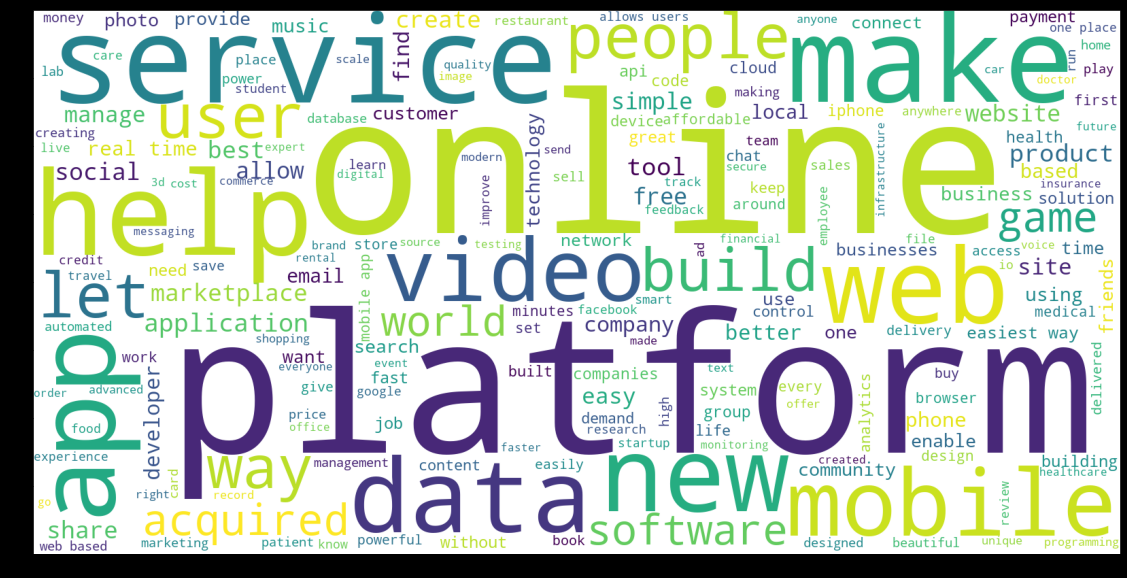

In [112]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['clean_Description'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

In [167]:
  fig = px.bar(df,
               x='words',y='Name',
               labels={
                     "words": "Total Number Of Words",
                     "Name": "Startup Name"
                 },
               title="Description Length For Each Startup",color='words')
  fig.update_layout( title_x=0.5)
  fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="black")

In [170]:
df.head()

,Unnamed: 0,Name,Class,Status,Description,clean_Description
0,0,Awesound,F2,-1,AdWords for podcasts,adwords podcasts
1,1,BillionToOne,F2,-1,Fetal genetic testing in India,fetal genetic testing india
2,2,Bulletin,F2,-1,Airbnb for retail,airbnb retail
3,3,Cerplus,F2,-1,B2B marketplace for surplus produce,b2b marketplace surplus produce
4,4,ConnectHealth,F2,-1,Telemedicine and prescription delivery in Africa,telemedicine prescription delivery africa


In [182]:
from collections import Counter
x=Counter(" ".join(df["clean_Description"]).split()).most_common(100)
df_words=pd.DataFrame(x)
df_words=df_words.rename(columns={0:'word',1:'frequency'})
fig = px.scatter(df_words, x="frequency", text="word", log_x=True, size_max=60)

fig.update_traces(textposition='top center')

fig.update_layout(
    height=800,
    title_text='Frequency Of Each Word',
    title_x=0.5
)
fig.update_yaxes(showticklabels=False)
fig.show()